# **Comparative Analysis of MLAs to predict sleep health disorders**



In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
datapath = "Downloads/Sleep_health_and_lifestyle_dataset.csv"

In [4]:
sleep_data = pd.read_csv(datapath)
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## **Exploratory Data Analysis**

In [7]:
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
num_cols = list(set(sleep_data.columns) ^ set(cat_cols))

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Correlation Matrix of Numerical Values**

<AxesSubplot:>

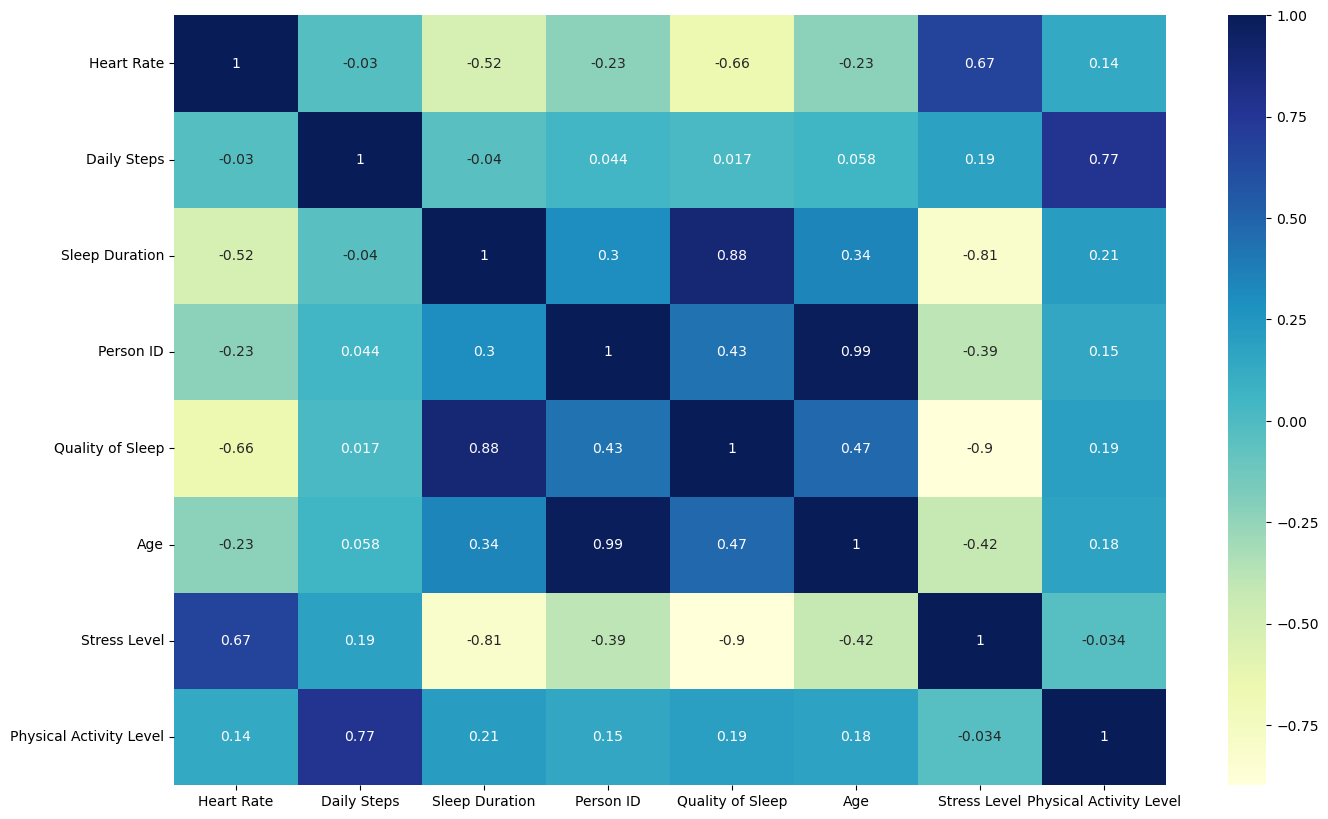

In [9]:
plt.figure(figsize=[16,10])
sns.heatmap(sleep_data[num_cols].corr(), annot=True, cmap='YlGnBu')

### **Histograms of Categorical Values**

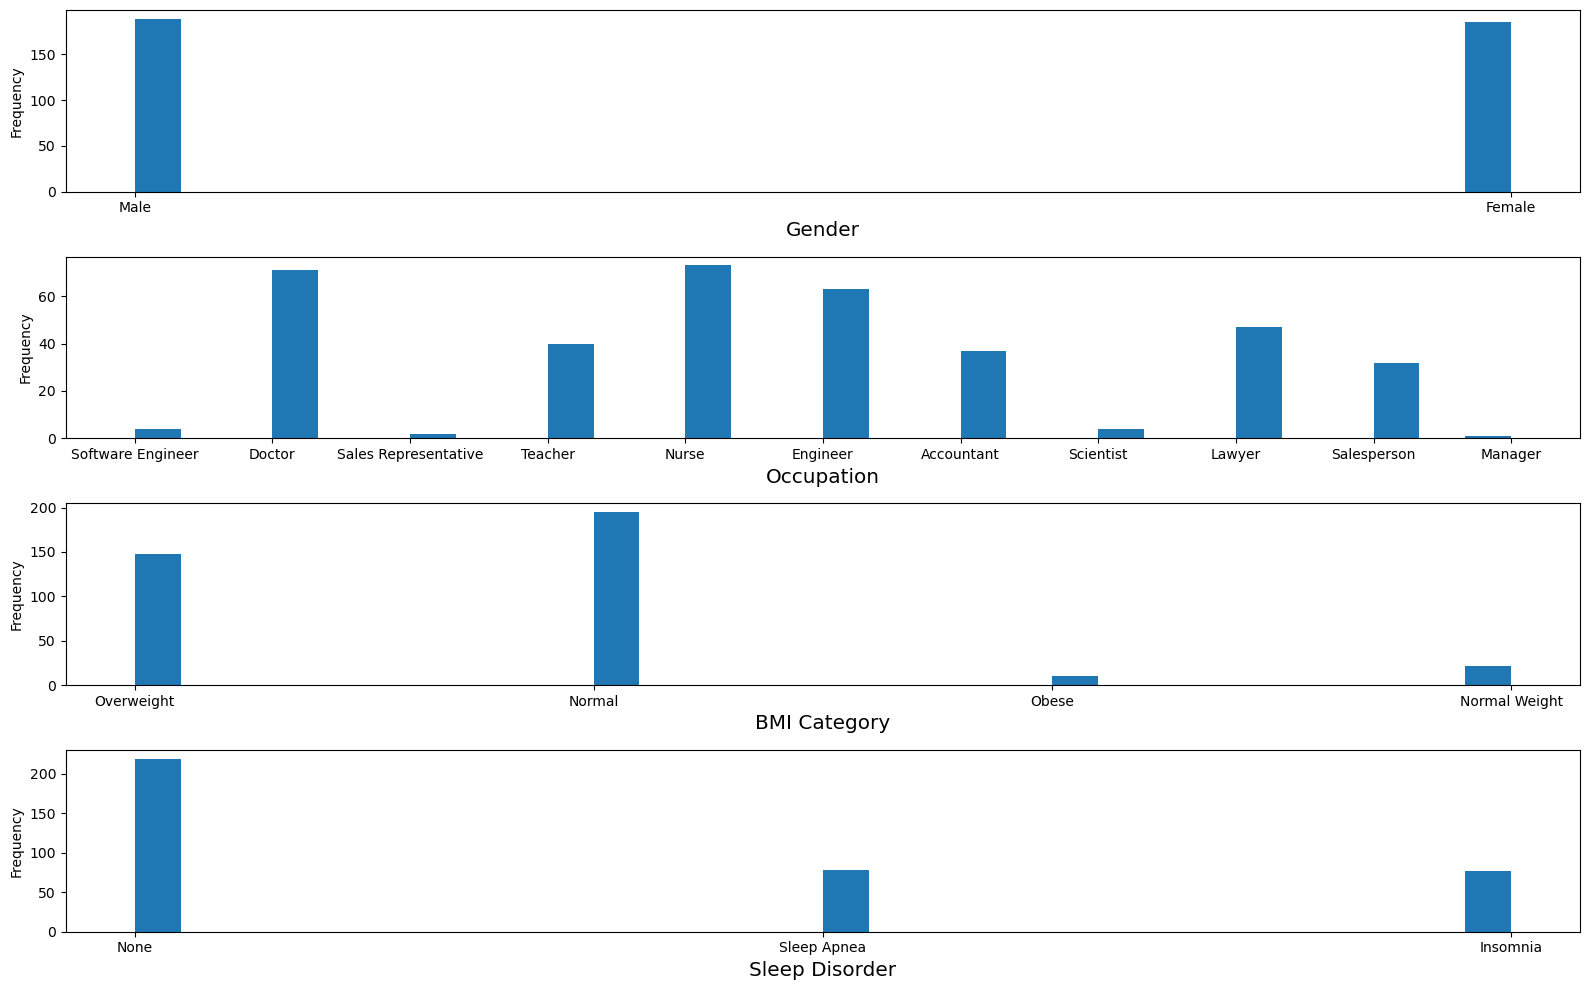

In [10]:
def plot_histograms(df):
    # Create a figure for subplots (adjust figure size as needed)
    plt.figure(figsize=(16, 10))

    # Calculate the number of rows and columns for subplots
    n_rows = int(np.ceil(len(df.columns) / 1))  # Consider 3 columns per row
    n_cols = min(1, len(df.columns))  # Limit to a maximum of 3 columns

    for i, col in enumerate(df.columns):
        # Calculate subplot position based on index
        row = (i // n_cols) + 1
        col_within_row = (i % n_cols) + 1

        # Create subplot and plot histogram
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist(df[col], bins=30)

        # Customize subplot elements (optional)
        plt.xlabel(col, fontsize='x-large')
        plt.ylabel('Frequency')

    # Adjust spacing between subplots for better readability
    plt.tight_layout()

    plt.show()

plot_histograms(sleep_data[cat_cols].copy())

### **Data Pre-processing**

In [11]:
sleep_data =  sleep_data.drop('Person ID', axis=1)
sleep_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [12]:
sleep_data['Systolic'] = sleep_data['Blood Pressure'].str.split('/').str[0].astype(int)
sleep_data['Diastolic'] = sleep_data['Blood Pressure'].str.split('/').str[1].astype(int)
sleep_data = sleep_data.drop('Blood Pressure', axis=1)
sleep_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [13]:
sleep_data['BMI Category'] = sleep_data['BMI Category'].replace(['Normal Weight'], 'Normal')
sleep_data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [14]:
sleep_data['BMI Category'] = sleep_data['BMI Category'].map({'Normal': 0,'Overweight':1,'Obese':2}).astype(int)
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic                 374 non-null    int64  
 12  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 38.1+ KB


In [15]:
sleep_data['Gender'] = sleep_data['Gender'].map({'Female': 0,'Male':1}).astype(int)
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic                 374 non-null    int64  
 12  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 38.1+ KB


In [16]:
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].map( {'None': 0, 'Sleep Apnea': 1,'Insomnia':2} ).astype(int)
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic                 374 non-null    int64  
 12  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 38.1+ KB


In [17]:
sleep_data['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [18]:
occ_map = {
    'Software Engineer': 0, 'Doctor': 1, 'Sales Representative': 2, 'Teacher': 3,
       'Nurse': 4, 'Engineer': 5, 'Accountant': 6, 'Scientist': 7, 'Lawyer': 8,
       'Salesperson': 9, 'Manager': 10
}

In [19]:
sleep_data['Occupation'] = sleep_data['Occupation'].map(occ_map)
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic                 374 non-null    int64  
 12  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = sleep_data.drop('Sleep Disorder', axis=1)
y = sleep_data['Sleep Disorder']
X, y

(     Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0         1   27           0             6.1                 6   
 1         1   28           1             6.2                 6   
 2         1   28           1             6.2                 6   
 3         1   28           2             5.9                 4   
 4         1   28           2             5.9                 4   
 ..      ...  ...         ...             ...               ...   
 369       0   59           4             8.1                 9   
 370       0   59           4             8.0                 9   
 371       0   59           4             8.1                 9   
 372       0   59           4             8.1                 9   
 373       0   59           4             8.1                 9   
 
      Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
 0                         42             6             1          77   
 1                         60             8     

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## **Model Baselines**

### **K Nearest Neighbor**

In [23]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
print(classification_report(y_test ,knn_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        62
           1       0.95      0.70      0.81        27
           2       0.72      0.88      0.79        24

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.85       113
weighted avg       0.90      0.88      0.88       113



### **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logr_cls = LogisticRegression()
logr_cls.fit(X_train, y_train)

LogisticRegression()

In [28]:
print(classification_report(y_test, logr_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        62
           1       0.95      0.70      0.81        27
           2       0.35      0.29      0.32        24

    accuracy                           0.68       113
   macro avg       0.67      0.61      0.63       113
weighted avg       0.68      0.68      0.68       113



### **Ridge Classifier**

In [29]:
from sklearn.linear_model import RidgeClassifier

In [30]:
ridge_cls = RidgeClassifier()
ridge_cls.fit(X_train, y_train)

RidgeClassifier()

In [31]:
print(classification_report(y_test, ridge_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        62
           1       0.95      0.74      0.83        27
           2       0.81      0.88      0.84        24

    accuracy                           0.89       113
   macro avg       0.89      0.86      0.87       113
weighted avg       0.90      0.89      0.89       113



### **Support Vector Machine**

In [32]:
from sklearn.svm import LinearSVC

In [33]:
svm_cls = LinearSVC()
svm_cls.fit(X_train, y_train)

LinearSVC()

In [34]:
print(classification_report(y_test, svm_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74        62
           1       0.67      0.59      0.63        27
           2       0.50      0.04      0.08        24

    accuracy                           0.64       113
   macro avg       0.60      0.51      0.48       113
weighted avg       0.61      0.64      0.57       113



### **Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
print(classification_report(y_test, dt_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.90      0.70      0.79        27
           2       0.80      0.83      0.82        24

    accuracy                           0.88       113
   macro avg       0.87      0.84      0.85       113
weighted avg       0.89      0.88      0.88       113



### **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
print(classification_report(y_test, rf_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.91      0.74      0.82        27
           2       0.77      0.83      0.80        24

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



## **Feature Standardization**

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### **K Nearest Neighbor**

In [43]:
knn_cls.fit(X_train_scaled, y_train)
print(classification_report(y_test ,knn_cls.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.96      0.81      0.88        27
           2       0.88      0.88      0.88        24

    accuracy                           0.92       113
   macro avg       0.92      0.89      0.90       113
weighted avg       0.92      0.92      0.92       113



### **Logistic Regression**

In [44]:
logr_cls.fit(X_train_scaled, y_train)
print(classification_report(y_test, logr_cls.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.96      0.81      0.88        27
           2       0.87      0.83      0.85        24

    accuracy                           0.91       113
   macro avg       0.91      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



### **Ridge Classifier**

In [45]:
ridge_cls.fit(X_train_scaled, y_train)
print(classification_report(y_test, ridge_cls.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        62
           1       0.91      0.74      0.82        27
           2       0.80      0.83      0.82        24

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.89      0.88      0.88       113



### **Support Vector Machine**

In [46]:
svm_cls.fit(X_train_scaled, y_train)
print(classification_report(y_test, svm_cls.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.95      0.78      0.86        27
           2       0.88      0.88      0.88        24

    accuracy                           0.91       113
   macro avg       0.91      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



### **Decision Tree**

In [47]:
dt_cls.fit(X_train_scaled, y_train)
print(classification_report(y_test, dt_cls.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.90      0.67      0.77        27
           2       0.80      0.83      0.82        24

    accuracy                           0.88       113
   macro avg       0.87      0.83      0.84       113
weighted avg       0.88      0.88      0.87       113



### **Random Forest**

In [48]:
rf_cls.fit(X_train_scaled, y_train)
print(classification_report(y_test, rf_cls.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.91      0.74      0.82        27
           2       0.77      0.83      0.80        24

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



## **Feature Selection**

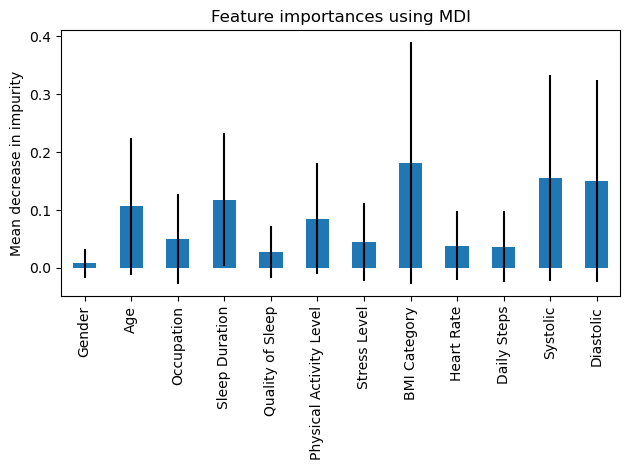

In [49]:
importances = rf_cls.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_cls.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()